In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
data_path = os.getenv('DATA_PATH')
result_path = os.getenv('RESULT_PATH')
root = os.getenv('ROOT')

os.chdir(root)
os.getcwd()

'/disks/qnap3/users/23-miura/coauth-interest'

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random
from scipy.stats import expon
from scipy.stats import pareto
import os


from importlib import reload

import source.package.util as util
util = reload(util)


In [3]:
year_df = pd.read_pickle(data_path + 'paper_detail/year.pickle')
authors_valid = pd.read_pickle(result_path + 'authors_valid.pickle')

KeyboardInterrupt: 

In [ ]:
merged = pd.merge(authors_valid, year_df, on='eid', how='left')
merged.sort_values("year", inplace=True)
merged["shuffled_year"] = merged["year"].sample(frac=1).values
merged.head()

,eid,authid,authseq,indexname,surname,givenname,doctype,year
0,85015329278,6506594745,1,Dereli O.,Dereli,Ömer,ar,2017
1,85015329278,55860963200,4,Karakas Sarikaya E.,Karakaş Sarikaya,Ebru,ar,2017
2,85015329278,16175094900,2,Erdogdu Y.,Erdoğdu,Yusuf,ar,2017
3,85015329278,57193622072,3,Ates L.,Ateş,Levent,ar,2017
4,85015329278,57193630639,5,Ozturan F.P.,Özturan,F. Pınar,ar,2017


52


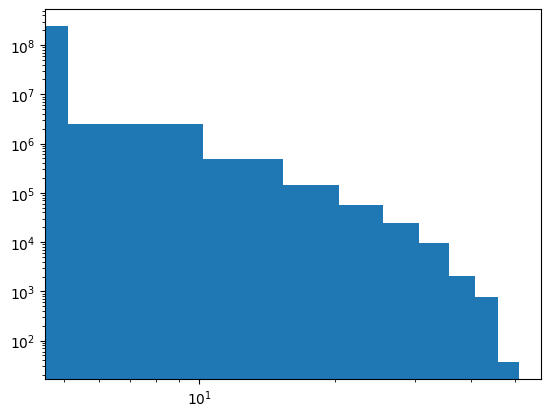

In [ ]:
group = merged[["year","authid"]].groupby(by="authid").diff().dropna()
print(group["year"].nunique())

plotter(group["year"].values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)

104


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0.00017939, 0.0003487 , 0.00052108, 0.00072105, 0.0009262 ,
        0.00112651, 0.00131808, 0.00151993, 0.00173219, 0.00195786,
        0.00217606, 0.00239696, 0.00263052, 0.0028692 , 0.00312618,
        0.00338217, 0.00361563, 0.00386939, 0.00412471, 0.00440811,
        0.0047174 , 0.0050135 , 0.00530265, 0.00561921, 0.00596334,
        0.00630854, 0.0067568 , 0.00720081, 0.00764392, 0.00807911,
        0.00853277, 0.00900253, 0.00951593, 0.01009458, 0.01076995,
        0.01154784, 0.01242106, 0.01333423, 0.01427433, 0.01531592,
        0.01641249, 0.01768622, 0.01910628, 0.02055839, 0.0220403 ,
        0.02352458, 0.02509017, 0.0266837 , 0.02844526, 0.03033008,
        0.03236318, 0.03478951, 0.03237632, 0.03032378, 0.02844242,
        0.02669502, 0.0250785 , 0.02351411, 0.02202153, 0.02057411,
        0.01911072, 0.0176939 , 0.01642293, 0.01531707, 0.01427866,
        0.01332496, 0.01241119, 0.01156013, 0.0107543 , 0.01008729,
        0.0095196 , 0.00901127, 0.00852638, 0.00

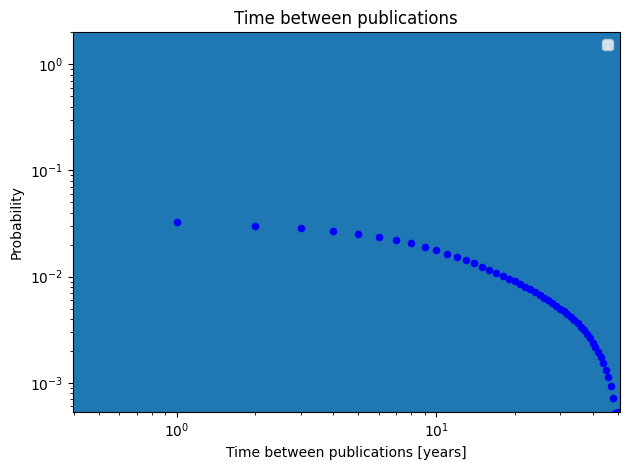

In [ ]:
group_shuflled = merged[["shuffled_year","authid"]].groupby(by="authid").diff().dropna()
print(group_shuflled["shuffled_year"].nunique())

plotter(group_shuflled["shuffled_year"].values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)
plt.show()

In [121]:
merged = merged[['eid','authid', 'year', 'shuffled_year']]
merged.to_pickle(result_path + 'time_between_publications.pickle')

,eid,authid,year,shuffled_year
22875929,14792462,35399872200,1970,2008
57080137,14888096,7005560330,1970,1997
57080138,14901281,57217394287,1970,2018
57080139,14888097,7409818227,1970,2011
57080140,14901282,7101930432,1970,2016
...,...,...,...,...
86597809,85121394226,57201395607,2022,2015
86597810,85121394226,14054955600,2022,1981
86597811,85121394226,57192944024,2022,2013
219408465,85110282930,57226081428,2022,2014


## Saved

In [ ]:
merged = pd.read_pickle(result_path + 'time_between_publications.pickle')
grouped = merged.groupby('authid')

In [3]:
for g in grouped:
    print(g)
    break

(4,                    eid  authid  year  shuffled_year
28398866      17858319       4  1978           2020
213709955     19206542       4  1980           1973
261319997     19982084       4  1982           1985
251979996     24229822       4  1988           2008
203768811  84886344041       4  1993           2015
203769980  84886345548       4  1994           2007
121940683     28565119       4  1994           2020
93831498      28953868       4  1995           1991
212867023     29134046       4  1995           2020
270201567     28977611       4  1995           2017
270201564     28977611       4  1995           2009
270201563     28977611       4  1995           1998
270201565     28977611       4  1995           2004
270201566     28977611       4  1995           2012
219788909     33950403       4  2000           2019
182427446     39177620       4  2000           2018
149004920  85033485934       4  2005           2016
94916306   84928074476       4  2007           2018
13000472

In [ ]:
shuffled_year_author = pd.DataFrame()
for g in grouped:
    shuffled_year_author = pd.concat([
        shuffled_year_author,\
        pd.DataFrame({\
          "shuffled_year_author":g[1]['year']\
            .sample(frac=1)\
            .sort_values()\
            .diff().dropna()\
            ,"authid":g[0]})],
          axis='index')
    print(shuffled_year_author.tail(3))
shuffled_year_author.head()

In [ ]:
year_diff = merged[["authid","year"]].groupby(by="authid").diff().dropna()
year_diff.head()

/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:44: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(left, right)


Calculating best minimal value for power law fit
3.4645901336575933
0.016691162225342757
2.0
0.140575482259355
[0.00466735]


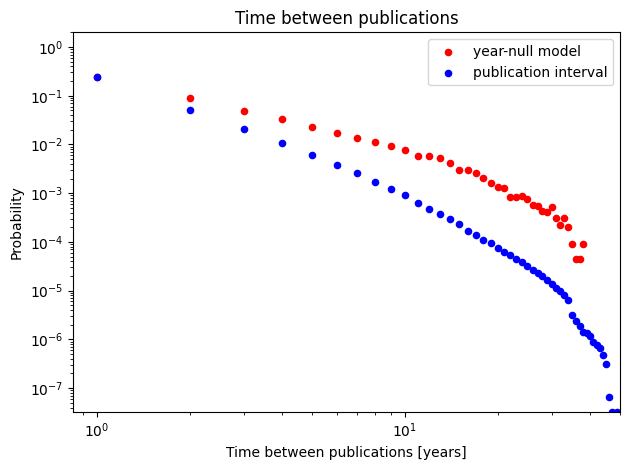

In [158]:
import powerlaw
# plotter(group_shuflled["shuffled_year"].values,
#         count='probability',
#         plot='power-law',
#         c='red',
#         xlabel='Time between publications',
#         ylabel='Probability',
#         title='Time between publications',
#         save=True,
#         path=result_path+'time_between_publications.png'
# )

bins, hist = plotter(shuffled_year_author["shuffled_year_author"].values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        c="r",
        l="year-null model",
        # limit=(min(bins_original), max(bins_original), min(hist_original), max(hist_original)),
        save=True,
        path=result_path+'time_between_publications.png'
)
plotter(year_diff.values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        l="publication interval",
        save=True,
        path=result_path+'time_between_publications.png'
)


data = shuffled_year_author["shuffled_year_author"].values
data_cutoff = data[data<10]

# Fit the data to a power-law distribution
# fit = Fit(data+1)
fit = Fit(data_cutoff+1)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.power_law.pdf(10))  # The probability density function at x=10

In [139]:
year_diff.to_pickle(result_path+"year_diff_single.pickle")
shuffled_year_author.to_pickle(result_path+"shuffled_year_author.pickle")

In [105]:
from powerlaw import Fit

# Your data
data = group["year"].values
data_cutoff = data[data<32]

# Fit the data to a power-law distribution
fit = Fit(data_cutoff+1)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.power_law.pdf(10))  # The probability density function at x=10

# data[data<32]
# Calculating best minimal value for power law fit
# 4.709575229895229%
# 0.0033165271087566006
# 10.0
# 0.07893690808343135
# [0.37095752]

# data[data<25]
# Calculating best minimal value for power law fit
# 4.477011135671789%
# 0.0019396112729131846
# 7.0
# 0.09248904371811006
# [0.10060284]

Calculating best minimal value for power law fit
4.477011135671789%
0.0019396112729131846
7.0
0.09248904371811006
[0.10060284]


<Axes: >

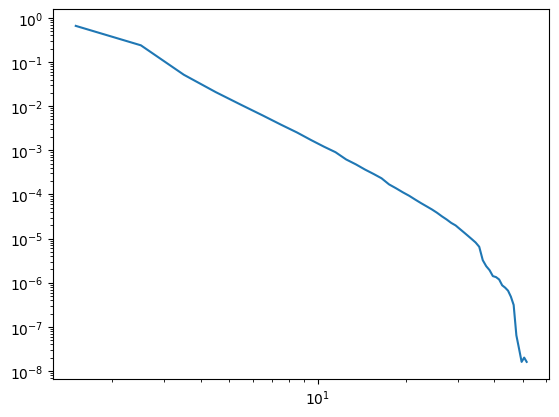

In [99]:
from powerlaw import plot_pdf
# Plot the data and the fitted distribution
plot_pdf(data+1, linear_bins=True )#, powerlaw_fit=fit)

plotter(group["year"].values,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([6.58912046e-01, 2.38906178e-01, 5.15221605e-02, 2.07454977e-02,
        1.06303523e-02, 6.15527213e-03, 3.80745090e-03, 2.53816900e-03,
        1.70367880e-03, 1.21087109e-03, 9.06006071e-04, 6.20957779e-04,
        4.79561643e-04, 3.65846084e-04, 2.91437667e-04, 2.32511196e-04,
        1.69181455e-04, 1.37657586e-04, 1.11810027e-04, 9.32139661e-05,
        7.63340924e-05, 6.34828281e-05, 5.37174788e-05, 4.57166603e-05,
        3.84651633e-05, 3.18985298e-05, 2.70641985e-05, 2.26689855e-05,
        1.98691019e-05, 1.64770128e-05, 1.37738158e-05, 1.15459948e-05,
        9.70089162e-06, 8.17404863e-06, 6.52231874e-06, 3.23900202e-06,
        2.36882237e-06, 1.92567533e-06, 1.41404193e-06, 1.34152696e-06,
        1.18441119e-06, 8.74208256e-07, 7.73493019e-07, 6.60691954e-07,
        4.83433137e-07, 3.14231539e-07, 6.44577516e-08, 3.22288758e-08,
        1.61144379e-08, 3.22288758e-08]),
 array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
        12.5, 13.5, 

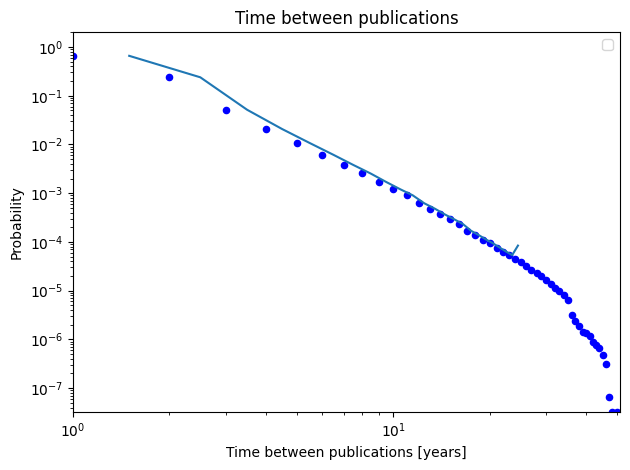

In [109]:
from powerlaw import plot_pdf
# Plot the data and the fitted distribution
plot_pdf(data_cutoff+1, linear_bins=True)#, powerlaw_fit=fit)

plotter(group["year"].values+1,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)

In [110]:
import numpy as np

def exp_powerlaw_pdf(x, a, xmin):
    return np.exp(-x) * np.power(x, -a) / np.sum(np.exp(-np.arange(xmin, np.inf)) * np.power(np.arange(xmin, np.inf), -a))

data = group["year"].values
data_cutoff = data[data<32]
# Fit the data to the custom distribution
# fit = Fit(data+1, pdf=exp_powerlaw_pdf, xmin=1, discrete=True)
fit = Fit(data_cutoff+1, pdf=exp_powerlaw_pdf, xmin=1, discrete=True)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.pdf(10))  # The probability density function at x=10

# no cutoff
# 1.998224856370066
# 6.335865726294845e-05
# 1.0
# 0.13849193548545746
# (array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 32.,
#        41., 53.]), array([6.58912046e-01, 2.38906178e-01, 5.15221605e-02, 2.07454977e-02,
#        1.06303523e-02, 4.98136152e-03, 2.12092390e-03, 1.05843858e-03,
#        4.39450793e-04, 1.62790066e-04, 6.64930051e-05, 2.43166868e-05,
#        5.13692471e-06, 3.69960637e-07]))

# with cutoff <32
# 1.9983522728573533
# 6.33679842320187e-05
# 1.0
# 0.1384851979881413
# (array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 33.]), array([6.58937827e-01, 2.38915526e-01, 5.15241765e-02, 2.07463094e-02,
#        1.06307682e-02, 4.98155643e-03, 2.12100689e-03, 1.05848000e-03,
#        4.39467988e-04, 1.62796436e-04, 6.64956068e-05, 2.27212393e-05])

1.9983522728573533
6.33679842320187e-05
1.0
0.1384851979881413
(array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 33.]), array([6.58937827e-01, 2.38915526e-01, 5.15241765e-02, 2.07463094e-02,
       1.06307682e-02, 4.98155643e-03, 2.12100689e-03, 1.05848000e-03,
       4.39467988e-04, 1.62796436e-04, 6.64956068e-05, 2.27212393e-05]))


In [111]:
import numpy as np

def exp_cutoff_powerlaw_pdf(x, a, xmin):
    return np.exp(-1/x) * np.power(x, -a) / np.sum(np.exp(-1/np.arange(xmin, np.inf)) * np.power(np.arange(xmin, np.inf), -a))

data = group["year"].values
data_cutoff = data[data<32]
# Fit the data to the custom distribution
# fit = Fit(data+1, pdf=exp_cutoff_powerlaw_pdf, xmin=1, discrete=True)
fit = Fit(data_cutoff+1, pdf=exp_cutoff_powerlaw_pdf, xmin=1, discrete=True)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.pdf(10))  # The probability density function at x=10

# without cutoff
# 1.998224856370066
# 6.335865726294845e-05
# 1.0
# 0.13849193548545746
# (array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 32.,
#        41., 53.]), array([6.58912046e-01, 2.38906178e-01, 5.15221605e-02, 2.07454977e-02,
#        1.06303523e-02, 4.98136152e-03, 2.12092390e-03, 1.05843858e-03,
#        4.39450793e-04, 1.62790066e-04, 6.64930051e-05, 2.43166868e-05,
#        5.13692471e-06, 3.69960637e-07]))

# with cutoff <32
# 1.9983522728573533
# 6.33679842320187e-05
# 1.0
# 0.1384851979881413
# (array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 33.]), array([6.58937827e-01, 2.38915526e-01, 5.15241765e-02, 2.07463094e-02,
#        1.06307682e-02, 4.98155643e-03, 2.12100689e-03, 1.05848000e-03,
#        4.39467988e-04, 1.62796436e-04, 6.64956068e-05, 2.27212393e-05]))

1.9983522728573533
6.33679842320187e-05
1.0
0.1384851979881413
(array([ 1.,  2.,  3.,  4.,  5.,  6.,  8., 10., 12., 16., 20., 25., 33.]), array([6.58937827e-01, 2.38915526e-01, 5.15241765e-02, 2.07463094e-02,
       1.06307682e-02, 4.98155643e-03, 2.12100689e-03, 1.05848000e-03,
       4.39467988e-04, 1.62796436e-04, 6.64956068e-05, 2.27212393e-05]))


In [115]:
res = pd.read_pickle(result_path + 'As_100k.pickle')
res

,authid,year,seq,eid,source_authid,previous_work
6,35559088600,7,1,77950575482,57221030048,3.142705e+09
5,6603235184,0,2,40819808,7402948720,4.618880e+05
7,6701475619,33,69,84974535000,7402948720,3.384616e+10
8,6701475619,1,2,85020222878,7402948720,8.497454e+10
9,6701475619,0,2,85033679162,7402948720,8.502022e+10
...,...,...,...,...,...,...
70,57225802515,1,2,85051415338,55081912000,8.502363e+10
71,57225802515,0,1,85040100930,55081912000,8.505142e+10
72,57225802515,1,1,85062042971,55081912000,8.504010e+10
73,57225802515,0,1,85062593490,55081912000,8.506204e+10


In [117]:
# Your data
# data = res["year"].values
data_cutoff = data[data<32]

# Fit the data to a power-law distribution
# fit = Fit(data+1)
fit = Fit(data_cutoff+1)

# Print the results
print(fit.alpha)  # The power-law exponent
print(fit.sigma)  # The standard error of the exponent
print(fit.xmin)   # The lower bound of the power-law behavior
print(fit.D)      # The Kolmogorov-Smirnov statistic
print(fit.power_law.pdf(10))  # The probability density function at x=10

# Calculating best minimal value for power law fit
# 6.805007556301697% # maybe without %
# 0.10931461642797022
# 18.0
# 0.07147125819418121
# []

Calculating best minimal value for power law fit
6.805007556301697%
0.10931461642797022
18.0
0.07147125819418121
[]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([4.91928135e-01, 3.17027963e-01, 9.89667300e-02, 3.76680995e-02,
        2.01801180e-02, 1.06845755e-02, 7.00369869e-03, 4.48059324e-03,
        3.32972855e-03, 2.15450886e-03, 1.64886995e-03, 1.20975291e-03,
        8.70600423e-04, 6.06330483e-04, 5.17998164e-04, 3.70414126e-04,
        3.26793228e-04, 2.13742400e-04, 1.86842847e-04, 1.32316724e-04,
        1.04326648e-04, 7.19744818e-05, 6.32503022e-05, 4.36208980e-05,
        4.03493307e-05, 5.37991076e-05, 1.99929116e-05, 2.10834341e-05,
        1.30862694e-05, 1.30862694e-05, 1.19957470e-05, 9.45119458e-06,
        2.18104490e-06, 6.17962722e-06, 3.99858232e-06, 3.27156735e-06,
        2.18104490e-06, 1.09052245e-06, 1.45402993e-06, 2.54455239e-06,
        0.00000000e+00, 2.18104490e-06, 3.63507484e-07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.63507484e-07]),
 array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
        12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5

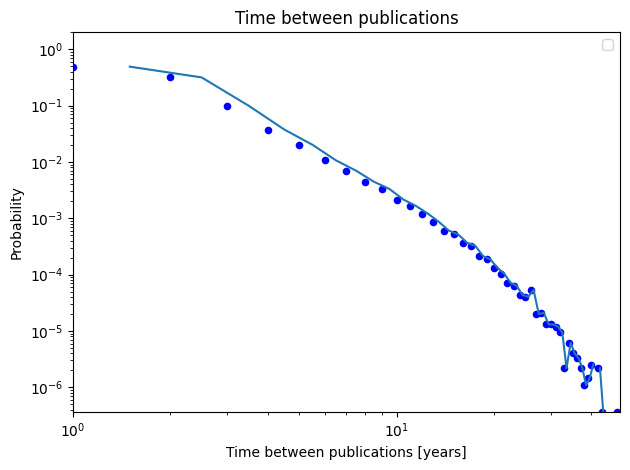

In [118]:
from powerlaw import plot_pdf
# Plot the data and the fitted distribution
plot_pdf(data+1, linear_bins=True)#, powerlaw_fit=fit)

plotter(data+1,
        count='probability',
        plot='power-law',
        xlabel='Time between publications',
        ylabel='Probability',
        title='Time between publications',
        save=True,
        path=result_path+'time_between_publications.png'
)

# 2024 ICSSI

In [4]:
d = "PM"
authors_valid= pd.read_pickle(result_path+f"authors_valid_{d}.pickle")
sample_authors = pd.read_pickle(result_path+f"sample_authors_{d}.pickle")

In [5]:
len(sample_authors), authors_valid.shape[0]

(1626418, 22084638)

In [6]:
authors_valid

,eid,authid,authseq,indexname,surname,givenname,doctype,partition
165,85015329432,36620106200,1,Bae H.,Bae,Hagyoul,ar,3.0
166,85015329432,56998595200,2,Bang T.,Bang,Tewook,ar,3.0
167,85015329432,7409873371,3,Kim C.-K.,Kim,Choong-Ki,ar,3.0
168,85015329432,56194519000,4,Hur J.,Hur,Jae,ar,3.0
169,85015329432,57193625556,5,Kim S.,Kim,Seyeob,ar,3.0
...,...,...,...,...,...,...,...,...
289838959,84927731812,56887670500,4,Calvani P.,Calvani,NO GIVENNAME,ar,3.0
289838960,84927731812,6507192277,5,Trucchi D.M.,Trucchi,NO GIVENNAME,ar,3.0
289838961,84927731812,9332709800,2,Pietropaolo A.,Pietropaolo,NO GIVENNAME,ar,3.0
289839046,84927667476,7004157249,1,De Dios-Leyva M.,De Dios-Leyva,NO GIVENNAME,ar,3.0


In [7]:
year_df = pd.read_pickle(data_path+"/paper_detail/year.pickle")
year_df = pd.DataFrame(year_df.sort_values()).rename(columns = {0:"year"})
year_df.head()

,year
eid,
14929032,1970
14878212,1970
14852370,1970
14865167,1970
14878213,1970


In [8]:
authors_valid = authors_valid.merge(year_df, on="eid", how="left")

In [38]:
[authors_valid["authseq"] ==1]

22084638

In [114]:
# def calculate_coauth_intervals(id,authors_valid,year_df):
#     works = authors_valid['eid'][authors_valid['authid']==id]
#     # works = works.sample(frac=0.5)
#     if works.shape[0]<3: return None
    
#     selected_papers = year_df[year_df.index.isin(works.values)]
#     # print(selected_papers)
#     np.random.shuffle(selected_papers.values)# null-year
#     selected_papers = selected_papers.sort_values(by='year')
#     # print(selected_papers)
#     selected_papers = selected_papers.assign(seq=list(range(0,len(selected_papers))))
#     coauthors = authors_valid[authors_valid['eid'].isin(works)].query(f"authid!={id}")
    
#     df_seqyear = pd.merge(coauthors,selected_papers, how='left', on='eid').sort_values(by='seq')
#     df_seqyear_multi = df_seqyear.groupby(by='authid', group_keys=True).filter(lambda x: len(x) > 1)
#     if len(df_seqyear_multi) < 3: return None
#     df_seqyear_delta = df_seqyear_multi.groupby(by='authid', group_keys=True)[['year','seq']] \
#     .apply(lambda x:  x - x.shift(1)) \
#     .dropna().astype(int).reset_index()
    
#     df_seqyear_delta = pd.merge(df_seqyear_delta, df_seqyear["eid"], how="left", left_on="level_1", right_index=True).drop(columns=["level_1"])
#     df_seqyear_delta["source_authid"] = id
#     df_seqyear_delta["previous_work"] = df_seqyear_delta.groupby("authid").shift(1)["eid"]

#     df_seqyear_delta = df_seqyear_delta.dropna()
#     return df_seqyear_delta

# util.calculate_coauth_intervals()

num_iterations = 5
batch_size = 1000

import tqdm
suffix = "_nullyear_5k"

for i in range(num_iterations):
    result = pd.DataFrame()
    for j in tqdm.tqdm(range(batch_size)):
        result = pd.concat([result, calculate_coauth_intervals(sample_authors[j+i*batch_size],authors_valid,year_df)],axis=0)
    result.to_pickle(result_path+f"/temp/{d}_{i:02}{suffix}.pickle")

auth = pd.concat([pd.read_pickle(result_path+f"/temp/{d}_{i:02}{suffix}.pickle") for i in range(num_iterations)],axis=0)
auth.to_pickle(result_path+f"/{d}{suffix}.pickle")

100%|███████████████████████████████████████| 1000/1000 [10:37<00:00,  1.57it/s]


In [11]:
result_PM = pd.read_pickle(result_path +"PM_default_5k.pickle")
result_PM.head()

,authid,year,seq,eid,source_authid,previous_work
2,55323498300,7,2,85018262613,23093224900,6.454914e+10
1,16506417600,1,1,84871729448,57209623964,8.487197e+10
4,35323952200,2,1,84871968771,57209623964,7.795399e+10
5,35323952200,1,1,84871729448,57209623964,8.487197e+10
8,55258183300,3,2,84871729448,57209623964,7.795399e+10


(array([  20.,   42.,   50.,   58.,   69.,   74.,   90.,   87.,   73.,
         126.,  125.,  109.,  116.,  123.,  189.,  170.,  155.,  260.,
         287.,  319.,  344.,  479.,  466.,  522.,  585.,  518.,  771.,
         801.,  820.,  910., 1031., 1444., 1483., 1687., 1483., 1739.,
        1741., 1742., 2041., 2509., 2472., 2989., 3298., 3499., 4144.,
        4041., 4274., 4773., 5283., 5706., 9285.]),
 array([1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
        1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
        1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
        1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015., 2016., 2017., 2018., 2019., 2020., 2021.]),
 <BarContainer object of 51 artists>)

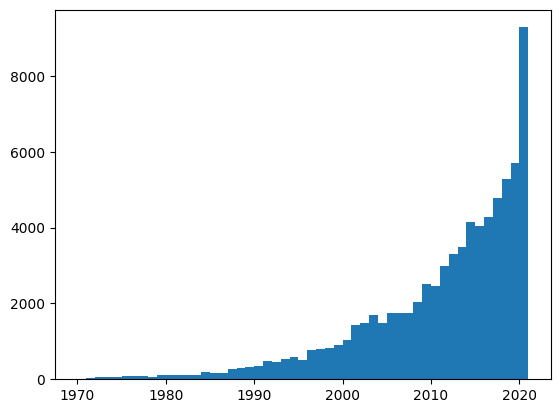

In [195]:
piT = pd.merge(result_PM,year_df, left_on="previous_work", right_on = "eid", how="left")
plt.hist(piT["year_y"], bins=list(range(1970,2022)))

In [198]:
guimera = pd.read_pickle(result_path + "guimera_As_year_priority.pickle")
guimera.head()

,authid,index,year,source_authid,eid,previous_work
1,24.0,1575,1.0,149,370,251.0
2,24.0,4450,7.0,149,1068,370.0
5,53.0,12669,15.0,149,2950,1445.0
2,1016.0,21192,3.0,3904,4936,4634.0
5,516.0,9186,7.0,566,2156,1462.0


In [42]:
authors_valid_nunique = authors_valid.groupby("eid")["authid"].nunique()>1
authors_valid = authors_valid[authors_valid["eid"].isin(authors_valid_nunique[authors_valid_nunique].index)]

In [43]:
groups = authors_valid.groupby("authid")

2.016622951571425

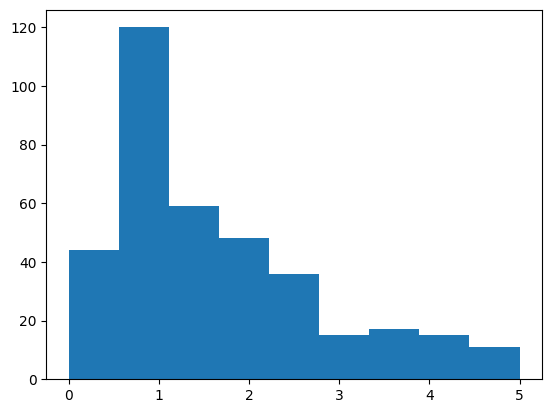

In [48]:
i = 0
density = []
for group in groups:
    i+=1
    if i>5000: break # calc p value for 5,000 authors
    first_year = group[1]["year"].min()
    last_year = group[1]["year"].max()
    if last_year - first_year < 3: continue

    coauthorship = group[1]["eid"].nunique()
    if coauthorship<3: continue
    
    density.append((last_year - first_year)/coauthorship)  
    # print(first_year, last_year, coauthorship, density[-1])
plt.hist(density, bins=np.linspace(0,5,10))
np.array(density).mean()

In [50]:
np.array(density).mean()

2.016622951571425

In [140]:
def plotter(res, u="years", count="probability",plot="power-law",limit=None, **args):
    bins = [i for i in range(int(min(res)),int(max(res)))]    
    hist,bins = np.histogram(res, bins=bins)

    # bins_plot=bins[:-1]
    bins_plot = (bins[1:]+bins[:-1])/2
    if count=="probability": hist = hist / len(res)
    elif count=="ccdf": hist = 1 - np.cumsum(hist)/len(res)
    else: hist = hist

    if len(bins)==0 or len(hist)==0: return None
    left, right, bottom, top = min(bins), max(bins), min(hist), max(hist) #max(hist)==0
    if limit==None:    
        if count=="probability" or count=="ccdf":
            yaxislabel = "Probability"
            if plot == "power-law" or plot=="poisson": bottom, top = hist[-1],2
        else:
            yaxislabel = "Frequency"
    else:
        left, right, bottom, top = limit
        if count=="probability" or count=="ccdf":
            yaxislabel = "Probability"
        else:
            yaxislabel = "Frequency"
            
    if plot=="power-law": xscale, yscale = 'log', 'log'
    elif plot=="poisson": xscale, yscale = 'linear', 'log'
    elif plot=="log": xscale, yscale = 'log', 'linear'
    elif plot=="linear": xscale, yscale = 'linear', 'log'
    else: raise ValueError("plot parameter received invalid string. plot must be one of {'power-law','poisson','log','linear'}")
    
    plt.legend()
    plt.title(args.pop("title", "Coauthorship interval"))
    plt.xlabel(f'{args.pop("xlabel", "Coauthorship interval")} [{u}]')
    plt.ylabel(yaxislabel)
    
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlim(left, right)
    plt.ylim(bottom, top)
    
    if count=="number":
        plt.xlim(1,max(bins)*1.5)
        plt.ylim(0.5,max(hist)*2)
        plt.ylabel('Frequency')
    # args = args
    if args.get("line", False):
        plt.plot(bins_plot[:-1], hist,color=args.get("c", "blue"),label=args.get("l", None))
    else:
        plt.scatter(bins_plot, hist,**args)

    plt.tight_layout()

    if args.get("save", None)==True:
        if args.get("path", None)==None: raise ValueError("Filename not provided")
        plt.savefig(args.get("path", "./plot.png"))
        plt.close()
    
    return hist, bins_plot

In [18]:
#null model
num = 50
def exponential(tau,n):
    return np.exp(-n/tau)/tau

def step(cum_p):
    import random 
    r=random.random()
    # print(r)
    if r<cum_p[0]:
        return 1
    else:
        return cum_p[cum_p<=r].argmax()+1 + 1

In [ ]:
p=np.array([exponential(np.array(density).mean(),i) for i in range(0,num)])
p = p/np.sum(p)

threshold = num
frequency = {i+1:0 for i in range(num)}
for i in range(5000):
    s = 0
    while s<threshold:
        v = step(p.cumsum())
        s += v
        if s>threshold:
            break
        frequency[v] += 1
hist = np.array(list(frequency.values()))
hist = hist/hist.sum()
p[:5], hist[:5]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
3.6942064956899294 0.056874743702456 None 0.011899167558680923


[]

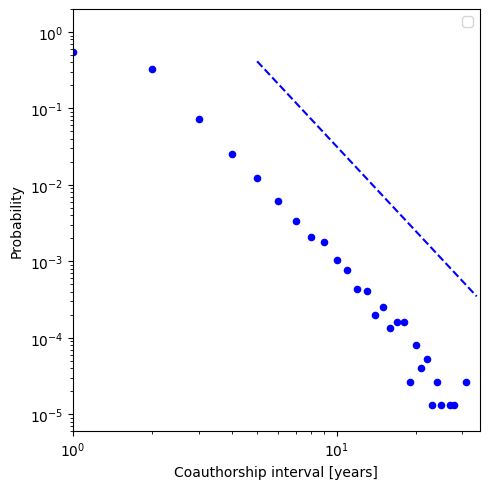

In [13]:
import powerlaw
plt.figure(figsize=(5,5))
data = result_PM["year"]+1
fit = powerlaw.Fit(data, discrete=True)
print(fit.alpha, fit.sigma, fit.xmax,fit.D)

# empirical
fit.power_law.plot_pdf(color='b', linestyle='--') #label=f"fit (α={fit.alpha:.2})")
# powerlaw.plot_pdf(data,color="b",label=f"Physics (α={fit.alpha:.2})")
util.plotter(data,title=None,s=40,edgecolors='blue',facecolor='white',label="Empirical")

# null-model
# plt.plot(frequency.keys(),hist,color="grey",label="null")
plt.xlim(1,35)
plt.ylim(6*10**-6,2)

plt.plot()
plt.legend()
plt.plot()

In [15]:
partitions = pd.read_pickle(result_path+"partitions_id_lookup.pickle")
disciplines = partitions["name"]

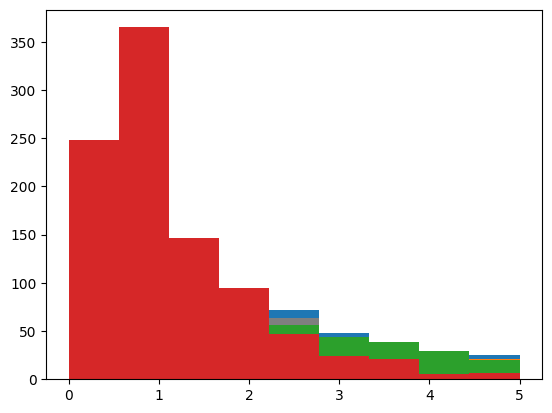

In [189]:
import tqdm
for d in tqdm.tqdm(disciplines):
    authors_valid = pd.read_pickle(result_path+f"authors_valid_{d}.pickle")
    authors_valid = authors_valid.merge(year_df, on="eid", how="left")
    authors_valid_nunique = authors_valid.groupby("eid")["authid"].nunique()>1
    authors_valid = authors_valid[authors_valid["eid"].isin(authors_valid_nunique[authors_valid_nunique].index)]
    
    groups = authors_valid.groupby("authid")
    
    i = 0
    density = []
    for group in groups:
        i+=1
        if i>5000: break # calc p value for 5,000 authors
        first_year = group[1]["year"].min()
        last_year = group[1]["year"].max()
        if last_year - first_year < 3: continue
    
        coauthorship = group[1]["eid"].nunique()
        if coauthorship<3: continue
        
        density.append((last_year - first_year)/coauthorship)  
        # print(first_year, last_year, coauthorship, density[-1])
    density = np.array(density)
    plt.hist(density, bins=np.linspace(0,5,10))
    
    p=np.array([exponential(density.mean(),i) for i in range(0,num)])
    p = p/np.sum(p)
    np.save(result_path+f"coauth_density_{d}",density)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
3.180149916946128 0.05213044760942451 None 0.03008806156673216
So


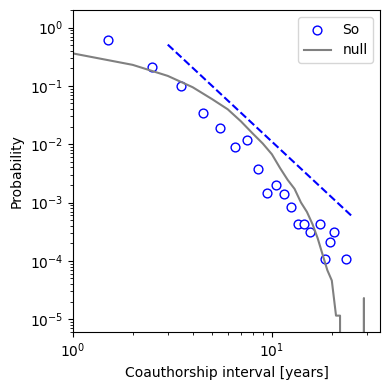

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
3.961886447196266 0.14717732083480425 None 0.0232598854768844
CS


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.xlim(left, right)


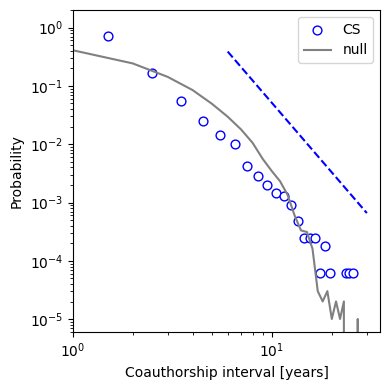

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
4.30668472869541 0.1643104851894086 None 0.019016373663370834
EB


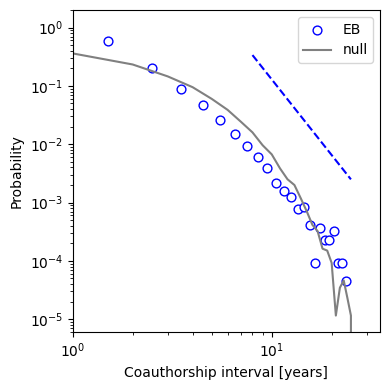

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
3.2407271540602816 0.04730178729736796 None 0.01798421514682269
PM


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.xlim(left, right)


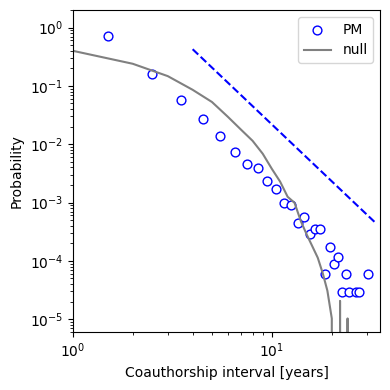

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
4.580228769180495 0.16711076805825206 None 0.01367822363602933
Ne


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.xlim(left, right)


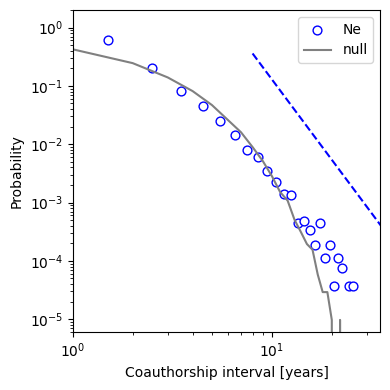

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
4.328872145459579 0.14432491122995736 None 0.022567095489378297
Im


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.xlim(left, right)


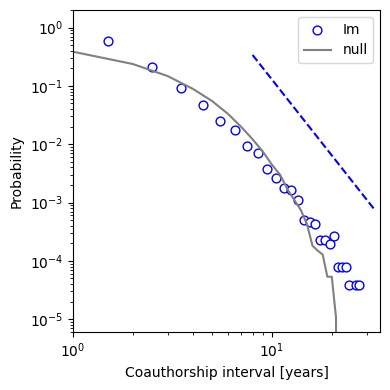

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
2.9850455772984095 0.040260392389705885 None 0.02488847091056723
Nt


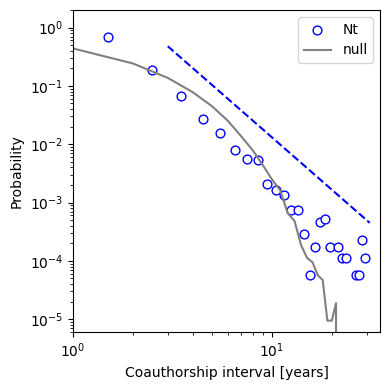

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
3.1819460458633846 0.04373524452800982 None 0.02156109809383444
Ch


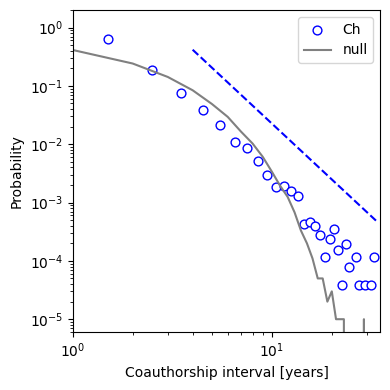

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
4.3763836360067305 0.1647506518340601 None 0.016468314202146228
Ps


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.xlim(left, right)


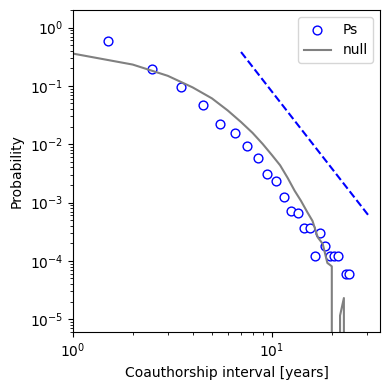

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
3.619986007460786 0.059376691679370375 None 0.0223752573564574
Mol-Md


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.xlim(left, right)


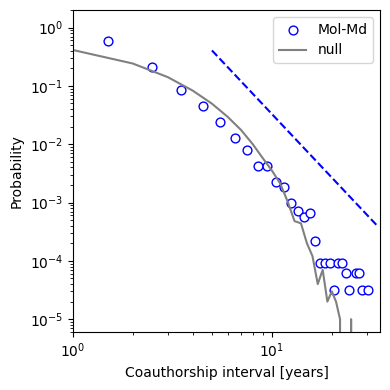

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
3.2866244689990864 0.05634404820564433 None 0.02641349432883744
Cli-Md


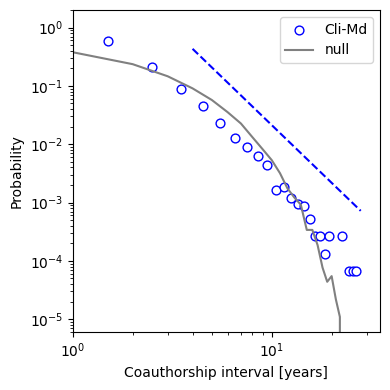

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
3.6641693900788024 0.07426301219196209 None 0.013985426443192561
AB


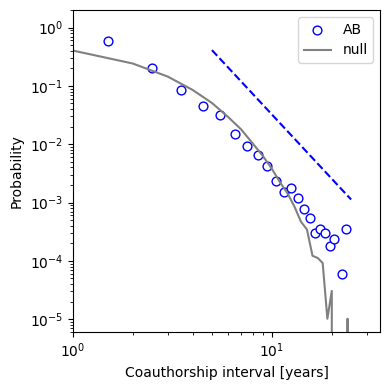

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
2.928111557175016 0.017477086133515955 None 0.0224945678623395
As


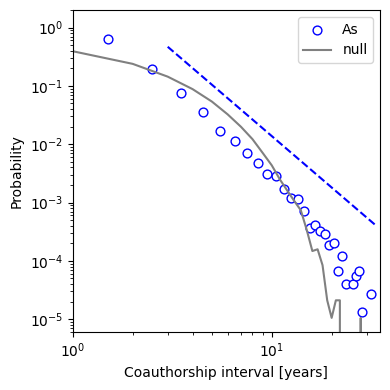

FileNotFoundError: [Errno 2] No such file or directory: '/disks/qnap3/users/23-miura/coauth-interest/data/Ma_5k.pickle'

In [30]:
import powerlaw

def null_distribution(d):
    num = 50
    density = np.load(result_path+f"coauth_density_{d}.npy")
    
    p=np.array([exponential(np.array(density).mean(),i) for i in range(0,num)])
    p = p/np.sum(p)
    
    threshold = num
    frequency = {i+1:0 for i in range(num)}
    
    for i in range(5000):
        s = 0
        while s<threshold:
            v = step(p.cumsum())
            s += v
            if s>threshold:
                break
            frequency[v] += 1
    hist = np.array(list(frequency.values()))
    hist = hist/hist.sum()
    return frequency, hist

for d in disciplines:
    frequency, hist = null_distribution(d)
    result = pd.read_pickle(result_path+ f"{d}_5k.pickle")
    plt.figure(figsize=(4,4))
    data = result[result["year"]>0]["year"]
    # data = result["year"] +1 
    fit = powerlaw.Fit(data, discrete=True)
    print(fit.alpha, fit.sigma, fit.xmax,fit.D)
    
    # empirical
    fit.power_law.plot_pdf(color='b', linestyle='--') #label=f"fit (α={fit.alpha:.2})")
    # powerlaw.plot_pdf(data,color="b",label=f"Physics (α={fit.alpha:.2})")
    print(d)
    util.plotter(data,title=None,s=40,facecolors='white',edgecolors='blue',label=d)
    
    # null-model
    plt.plot(frequency.keys(),hist,color="grey",label="null")
    plt.xlim(1,35)
    plt.ylim(6*10**-6,2)

    plt.legend()
    plt.savefig(result_path+f"{d}_plot")
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
3.5532910415017245 0.05773190605545596 None 0.023977324955855694
CS


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:49: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


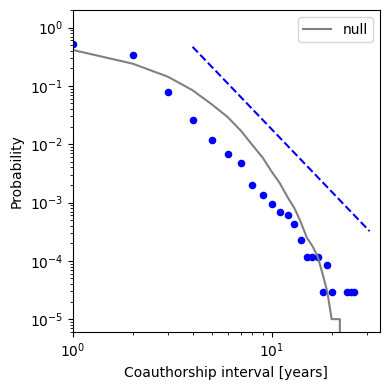

In [26]:
import powerlaw

def null_distribution(d):
    num = 50
    density = np.load(result_path+f"coauth_density_{d}.npy")
    
    p=np.array([exponential(np.array(density).mean(),i) for i in range(0,num)])
    p = p/np.sum(p)
    
    threshold = num
    frequency = {i+1:0 for i in range(num)}
    
    for i in range(5000):
        s = 0
        while s<threshold:
            v = step(p.cumsum())
            s += v
            if s>threshold:
                break
            frequency[v] += 1
    hist = np.array(list(frequency.values()))
    hist = hist/hist.sum()
    return frequency, hist

d = "CS"
frequency, hist = null_distribution(d)
result = pd.read_pickle(result_path+ f"{d}_5k.pickle")
plt.figure(figsize=(4,4))
# data = result[result["year"]>0]["year"]
data = result["year"] +1 
fit = powerlaw.Fit(data, discrete=True)
print(fit.alpha, fit.sigma, fit.xmax,fit.D)

# empirical
fit.power_law.plot_pdf(color='b', linestyle='--') #label=f"fit (α={fit.alpha:.2})")
# powerlaw.plot_pdf(data,color="b",label=f"Physics (α={fit.alpha:.2})")
print(d)
util.plotter(data,title=None,s=40,facecolors='white',edgecolors='blue',label=d)

# null-model
plt.plot(frequency.keys(),hist,color="grey",label="null")
plt.xlim(1,35)
plt.ylim(6*10**-6,2)

plt.legend()
plt.savefig(result_path+f"{d}_plot")
plt.show()

# empirical shuffled null-year model comparison

In [23]:
print(auth.shape[0])
print(result_As.shape[0])
print(auth["source_authid"].nunique())
print(result_As["source_authid"][:auth.shape[0]].nunique())

158426
2750975
3049
2425


In [41]:
works_test = auth["source_authid"].unique()
authors = result_As[result_As["source_authid"].isin(works_test)]["source_authid"].unique()

In [42]:
authors

array([57197435131, 35236910400,  8447975100, 24316204500, 57562266500,
       56533192400,  7005214733,  7007022475, 24734300400, 26435778900,
       57216011112, 57218835489, 55961503900,  6506675079, 24832900700,
       56511445600,  7003551110, 57189093711,  7005737807, 36483668600,
       55476304300, 54889607500,  8685859800, 57218943423,  7102018527,
       54390803400,  6602569589, 57498080400,  6602607320,  7006518498,
       35428153100,  6603795354,  6701408370,  6603902917, 56013248300,
        7202462821,  6508056463, 16479086800,  6603242013, 35227481700,
       16644262200, 55942612500, 23389399000,  6602488890,  6603875883,
       57203256647,  7202596067,  6602319535, 16441426300,  7003793601,
        7006553123, 36026604500, 55330157400,  7005127330, 57203923385,
        7102231509,  8415891400,  7402055952, 57191868023, 23399213000,
       36850431400, 56985257600,  7003953903,  7003541763,  9235640700,
       57194648747, 22634072800,  6603725947, 55853674400, 36674

In [47]:
diff_null_years = []
diff_year = []
for a in authors:
  diff_null_years.append(auth[auth["source_authid"]==a]["year"].sum())
  diff_years.append(result_As[result_As["source_authid"]==a]["year"].sum())


NameError: name 'diff_null_year' is not defined

(array([88., 45., 37., 22., 20., 15., 12., 16., 10., 12., 11.,  7.,  4.,
         7.,  5.,  6.,  5.,  4.,  4.,  6.,  4.,  4.,  3.,  4.,  0.,  2.,
         1.,  3.,  2.,  2.,  3.,  0.,  3.,  0.,  3.,  4.,  2.,  2.,  4.,
         2.,  3.,  1.,  1.,  2.,  4.,  1.,  0.,  0.,  4.]),
 array([  1.        ,   5.06122449,   9.12244898,  13.18367347,
         17.24489796,  21.30612245,  25.36734694,  29.42857143,
         33.48979592,  37.55102041,  41.6122449 ,  45.67346939,
         49.73469388,  53.79591837,  57.85714286,  61.91836735,
         65.97959184,  70.04081633,  74.10204082,  78.16326531,
         82.2244898 ,  86.28571429,  90.34693878,  94.40816327,
         98.46938776, 102.53061224, 106.59183673, 110.65306122,
        114.71428571, 118.7755102 , 122.83673469, 126.89795918,
        130.95918367, 135.02040816, 139.08163265, 143.14285714,
        147.20408163, 151.26530612, 155.32653061, 159.3877551 ,
        163.44897959, 167.51020408, 171.57142857, 175.63265306,
        179.69387

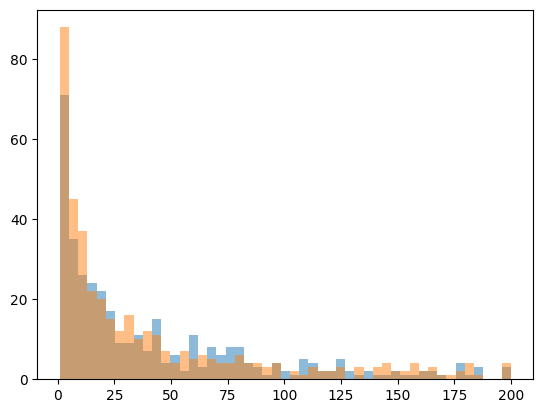

In [55]:

plt.hist(diff_null_years,bins=np.linspace(1,200,50),alpha=0.5)
plt.hist(diff_year,bins=np.linspace(1,200,50),alpha=0.5)


In [56]:
authors_valid.shape[0]

5866880